In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
X=np.load("X (1).npy")
Y=np.load("Y (1).npy")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [4]:
X.shapepe

(3248, 101)

In [8]:
input_size = 101
hidden_size = 200
num_classes = 200
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [9]:
Y.shape

(3248,)

In [10]:
Y

array([0, 0, 0, ..., 3, 0, 0])

In [11]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [12]:
model = Net(input_size,hidden_size,num_classes)
model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
epochs = 100

In [14]:
# test
losses=[]
for epoch in range(epochs):
    
    epoch +=1
    
    for x,y in zip(X_train,Y_train):
        y=np.array([y])
        x=torch.from_numpy(np.expand_dims(x, axis=0))
        y=torch.from_numpy(y)
        
        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))
        
        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        
            
        loss = criterion(outputs, labels)
        

        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 2.7418136596679688e-05
epoch 2, loss 2.86102294921875e-06
epoch 3, loss 0.0
epoch 4, loss 0.0
epoch 5, loss 0.0
epoch 6, loss 0.0
epoch 7, loss 0.0
epoch 8, loss 0.0
epoch 9, loss 0.0
epoch 10, loss 0.0
epoch 11, loss 0.0
epoch 12, loss 0.0
epoch 13, loss 0.0
epoch 14, loss 0.0
epoch 15, loss 0.0
epoch 16, loss 0.0
epoch 17, loss 0.0
epoch 18, loss 0.0
epoch 19, loss 0.0


KeyboardInterrupt: 

## Evaluate the performance on the training data

In [15]:
# X_train and Y_train
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

train_correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,train_compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(train_compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        train_correct+=1

print("The train accuracy is {}".format((train_correct/total_train_compounds)*100))

The train accuracy is 94.62880602121109


## Evaluate the model on the testing data

In [16]:
# X_test and Y_test
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 72.92307692307692


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

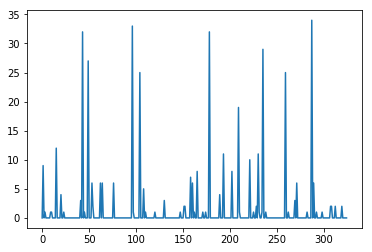

In [18]:
plt.plot(Y_test_pred)

In [19]:
## For the entire dataset

In [20]:
#X and Y
model_pred=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 92.45689655172413


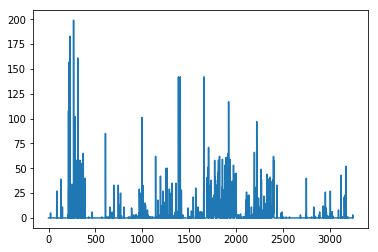

In [21]:
plt.plot(Y_pred)

torch.save(model.state_dict(),"Classification using DNN-Final.pytorch")

In [ ]:
# X_test and Y_test Error 
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    #Calculate the Error :
        
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

In [24]:
len(Y_test_pred)

325

In [25]:
len(Y_test)

325

In [27]:
np.linalg.norm(Y_test-Y_test_pred)

291.38119362786608

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_test_pred)

In [39]:
mse*19/200

24.817800000000002

In [38]:
Y_test_pred

[0,
 9,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 32,
 0,
 1,
 0,
 0,
 0,
 27,
 0,
 0,
 0,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 33,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 25,
 0,
 0,
 0,
 5,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 6,
 0,
 1,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 32,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 11,
 1,
 0,
 0,
 1,
 29,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [40]:
mean_squared_error(Y_pred,Y)*19/200

3.7945304802955668

In [41]:
mean_squared_error(Y_train_pred,Y_train)*19/200

1.4570133424563805